# Load data into pandas DataFrames

In [110]:
import pandas as pd

# Load the dataframes from the CSV files
df_combined_vs = pd.read_csv('Combined_vs.csv', delimiter=';')
df_mcts_vs = pd.read_csv('MCTS_vs.csv', delimiter=';')
df_minimax_vs = pd.read_csv('MiniMax_vs.csv', delimiter=';')
df_logic_vs = pd.read_csv('Logic_vs.csv', delimiter=';')
df_random_vs = pd.read_csv('Random_vs.csv', delimiter=';')

# Merge the dataframes in a single one with only the common columns
common_cols = []
for col in df_combined_vs.columns:
    if col in df_mcts_vs.columns and col in df_minimax_vs.columns and col in df_logic_vs.columns and col in df_random_vs.columns:
        common_cols.append(col)
df = pd.concat(
    objs=[df_combined_vs[common_cols], df_mcts_vs[common_cols], df_minimax_vs[common_cols], df_logic_vs[common_cols], df_random_vs[common_cols]],
    ignore_index=True
)

df

,agent0,agent1,N_BATTLES,winrate,avg_n_turns,avg_n_switches,avg_hp_residue
0,Combined,Random,100,63.00,10.86,0.00,30.42
1,Combined,Random,300,63.33,10.93,0.00,32.34
2,Combined,Logic,100,68.00,11.69,0.00,33.72
3,Combined,Logic,300,69.67,11.61,0.00,36.89
4,Combined,Combined,100,56.00,10.60,0.00,27.64
5,Combined,Combined,300,57.67,10.12,0.00,26.52
6,MCTS,Combined,100,52.00,10.48,1.00,23.49
7,MCTS,MiniMax,100,76.00,10.70,0.89,38.10
8,MCTS,MCTS,100,62.00,10.61,0.84,27.99
9,MCTS,Combined,300,56.33,10.37,0.91,26.19


# Build tables used for the plots

In [111]:
# Initializations
index_dict = {
    'Random': 0,
    'Logic': 1,
    'MiniMax': 2,
    'MCTS': 3,
    'Combined': 4
}
df_winrate_100 = pd.DataFrame(index=index_dict.keys(), columns=index_dict.keys())
df_winrate_300 = pd.DataFrame(index=index_dict.keys(), columns=index_dict.keys())
df_hp_residue_100 = pd.DataFrame(index=index_dict.keys(), columns=index_dict.keys())
df_hp_residue_300 = pd.DataFrame(index=index_dict.keys(), columns=index_dict.keys())

# Generate a dataframe with the winrate associated to all the combinations of battles
for agent in index_dict.keys():
    for opponent in index_dict.keys():
        condition = (df['agent0'] == agent) & (df['agent1'] == opponent)
        if df[condition].shape[0] > 0:
            agent0 = agent
            agent1 = opponent
            complementary_winrate = False
            query = (df['agent0'] == agent0) & (df['agent1'] == agent1)
        else:
            agent0 = opponent
            agent1 = agent
            complementary_winrate = True
            query = (df['agent0'] == agent0) & (df['agent1'] == agent1)
        # Winrate for 100 battles
        row = df[query & (df['N_BATTLES'] == 100)]
        winrate = float(row['winrate'].values[0])
        df_winrate_100.loc[agent, opponent] = winrate if not complementary_winrate else 100 - winrate
        hp_residue = float(row['avg_hp_residue'].values[0])
        df_hp_residue_100.loc[agent, opponent] = hp_residue
        # Winrate for 300 battles
        row = df[query & (df['N_BATTLES'] == 300)]
        winrate = float(row['winrate'].values[0])
        df_winrate_300.loc[agent, opponent] = winrate if not complementary_winrate else 100 - winrate
        hp_residue = float(row['avg_hp_residue'].values[0])
        df_hp_residue_300.loc[agent, opponent] = hp_residue


C:\Users\Gianluca\AppData\Local\Temp\ipykernel_372632\1905390713.py:31: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_winrate_100.loc[agent][opponent] = winrate if not complementary_winrate else 100 - winrate
C:\Users\Gianluca\AppData\Loc

### Winrate table over 100 battles

In [112]:
df_winrate_100

,Random,Logic,MiniMax,MCTS,Combined
Random,58.0,27.0,53.0,24.0,37.0
Logic,73.0,73.0,33.0,29.0,32.0
MiniMax,47.0,67.0,31.0,24.0,31.0
MCTS,76.0,71.0,76.0,62.0,52.0
Combined,63.0,68.0,69.0,48.0,56.0


### Winrate table over 300 battles

In [113]:
df_winrate_300

,Random,Logic,MiniMax,MCTS,Combined
Random,50.33,27.33,55.33,29.33,36.67
Logic,72.67,68.33,31.0,23.67,30.33
MiniMax,44.67,69.0,42.0,39.67,29.67
MCTS,70.67,76.33,60.33,58.0,56.33
Combined,63.33,69.67,70.33,43.67,57.67


### Average HP residue table over 100 battles

In [114]:
df_hp_residue_100

,Random,Logic,MiniMax,MCTS,Combined
Random,22.06,32.38,21.38,37.94,30.42
Logic,32.38,41.5,38.89,38.98,33.72
MiniMax,21.38,38.89,13.89,38.1,12.17
MCTS,37.94,38.98,38.1,27.99,23.49
Combined,30.42,33.72,12.17,23.49,27.64


### Average HP residue table over 300 battles

In [115]:
df_hp_residue_300

,Random,Logic,MiniMax,MCTS,Combined
Random,17.89,36.77,20.41,35.11,32.34
Logic,36.77,36.47,40.29,40.78,36.89
MiniMax,20.41,40.29,17.74,28.09,11.92
MCTS,35.11,40.78,28.09,25.86,26.19
Combined,32.34,36.89,11.92,26.19,26.52


# Winrate diagram vs Random agent

### Winrate diagram of each agent vs Random agent (over 100 battles)

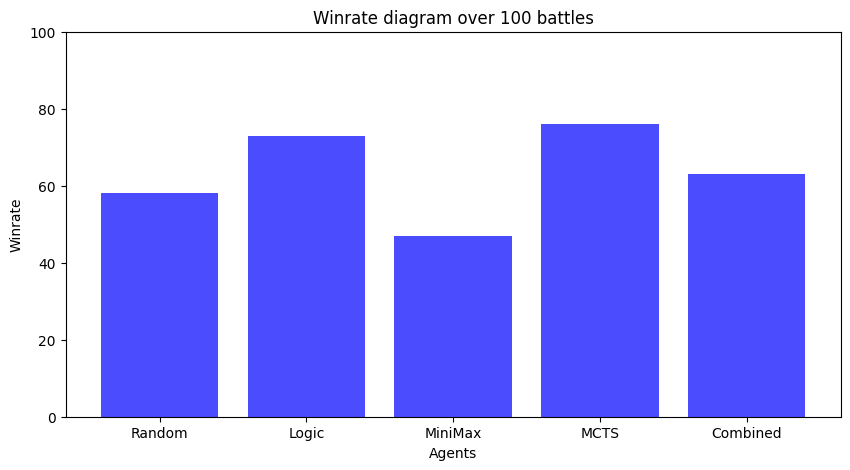

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_winrate_100.columns, df_winrate_100['Random'], color='blue', alpha=0.7)
plt.title('Winrate diagram over 100 battles')
plt.xlabel('Agents')
plt.ylabel('Winrate')
plt.ylim(0, 100)
plt.show()

### Winrate diagram of each agent vs Random agent (over 300 battles)

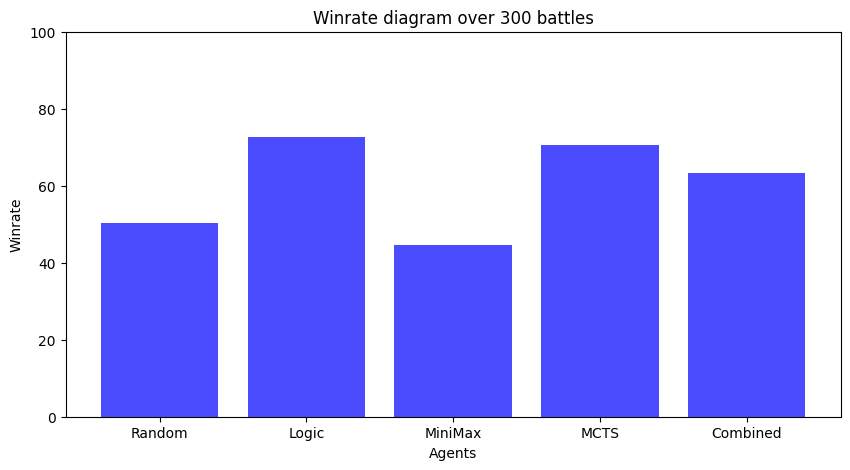

In [117]:
plt.figure(figsize=(10, 5))
plt.bar(df_winrate_300.columns, df_winrate_300['Random'], color='blue', alpha=0.7)
plt.title('Winrate diagram over 300 battles')
plt.xlabel('Agents')
plt.ylabel('Winrate')
plt.ylim(0, 100)
plt.show()

### HP residue diagram of each agent vs Random agent (over 100 battles)

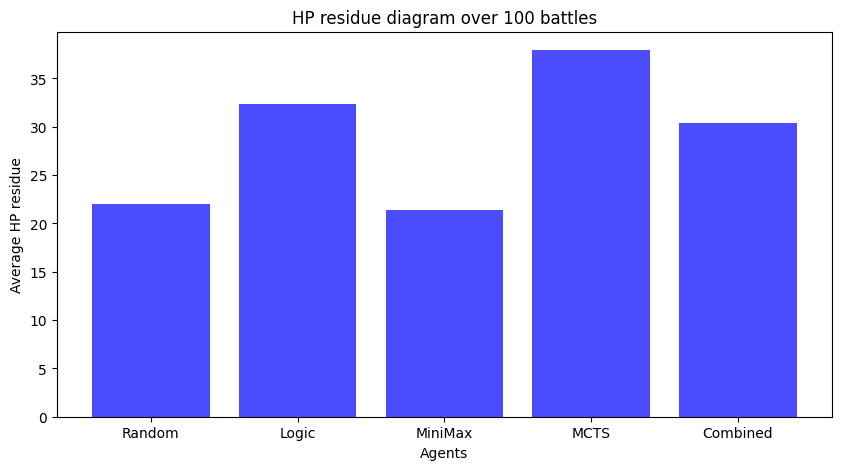

In [118]:
plt.figure(figsize=(10, 5))
plt.bar(df_hp_residue_100.columns, df_hp_residue_100['Random'], color='blue', alpha=0.7)
plt.title('HP residue diagram over 100 battles')
plt.xlabel('Agents')
plt.ylabel('Average HP residue')
plt.show()

### HP residue diagram of each agent vs Random agent (over 300 battles)

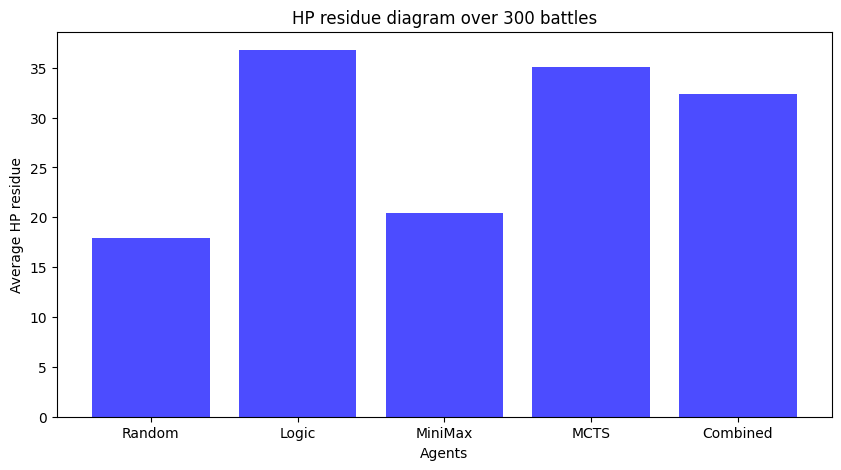

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df_hp_residue_300.columns, df_hp_residue_300['Random'], color='blue', alpha=0.7)
plt.title('HP residue diagram over 300 battles')
plt.xlabel('Agents')
plt.ylabel('Average HP residue')
plt.show()